In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [2]:
data = pd.read_csv('../data/preprocessing/credit_approval_uci.csv')
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,target
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1
2,a,24.50,NaN,u,g,q,h,NaN,NaN,NaN,0,f,g,280.0,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1


In [3]:
X_train, X_test, y_train, y_test = train_test_split(data.drop("target", axis=1),
                                                   data['target'],
                                                   test_size=0.3,
                                                   random_state=0
                                                   )

# mode imputation for  missing categorical variables

In [4]:
categorical_vars = X_train.select_dtypes(include='O').columns.to_list()
categorical_vars

['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13']

In [5]:
numerical_vars = X_train.select_dtypes(include='number').columns.to_list()
numerical_vars

['A2', 'A3', 'A8', 'A11', 'A14', 'A15']

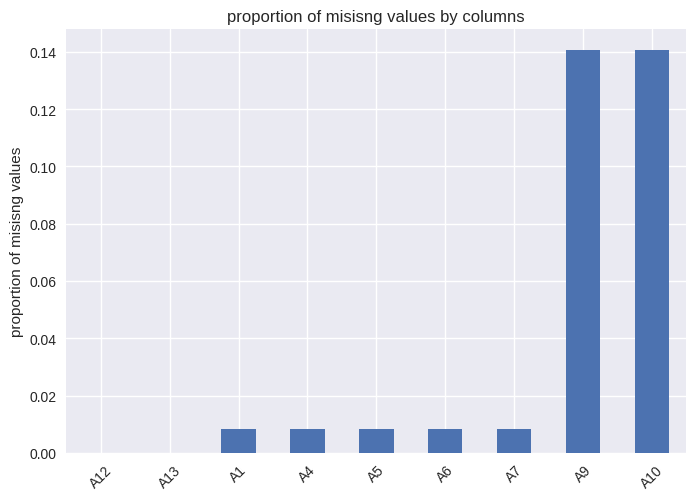

In [6]:
with plt.style.context('seaborn'):
    X_train[categorical_vars].isna().mean().sort_values().plot.bar(rot=45)
    plt.ylabel('proportion of misisng values')
    plt.title('proportion of misisng values by columns')
    plt.show()

In [7]:
imputer = SimpleImputer(strategy='most_frequent')
ct = ColumnTransformer(remainder='passthrough',
                      transformers=[('imputer', imputer, categorical_vars)])

In [8]:
ct.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer',
                                 SimpleImputer(strategy='most_frequent'),
                                 ['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10',
                                  'A12', 'A13'])])

In [9]:
ct.named_transformers_.imputer.statistics_

array(['b', 'u', 'g', 'c', 'v', 't', 'f', 'f', 'g'], dtype=object)

In [10]:
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

In [11]:
X_train = pd.DataFrame(X_train, columns = categorical_vars + numerical_vars)

In [12]:
X_train.head()

,A1,A4,A5,A6,A7,A9,A10,A12,A13,A2,A3,A8,A11,A14,A15
0,a,u,g,c,v,t,t,t,g,46.08,3.0,2.375,8.0,396.0,4159.0
1,a,u,g,q,v,f,f,f,g,15.92,2.875,0.085,0.0,120.0,0.0
2,b,y,p,w,v,t,t,f,g,36.33,2.125,0.085,1.0,50.0,1187.0
3,b,y,p,ff,ff,f,f,f,g,22.17,0.585,0.0,0.0,100.0,0.0
4,b,u,g,m,v,t,t,t,g,57.83,7.04,14.0,6.0,360.0,1332.0


# arbitrary string imputation for missing categorical variables

In [15]:
data = pd.read_csv('../data/preprocessing/credit_approval_uci.csv')
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,target
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1
2,a,24.50,NaN,u,g,q,h,NaN,NaN,NaN,0,f,g,280.0,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1


In [16]:
X_train, X_test, y_train, y_test = train_test_split(data.drop("target", axis=1),
                                                   data['target'],
                                                   test_size=0.3,
                                                   random_state=0
                                                   )

In [17]:
categorical_vars = X_train.select_dtypes(include='O').columns.to_list()
numerical_vars = [cols for cols in X_train.columns if cols not in categorical_vars]

In [18]:
categorical_vars

['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13']

In [19]:
numerical_vars

['A2', 'A3', 'A8', 'A11', 'A14', 'A15']

In [20]:
imputer = SimpleImputer(strategy='constant', fill_value='missing')
ct = ColumnTransformer(remainder='passthrough',
                      transformers=[('imputer', imputer, categorical_vars)])

In [21]:
ct.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer',
                                 SimpleImputer(fill_value='missing',
                                               strategy='constant'),
                                 ['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10',
                                  'A12', 'A13'])])

In [22]:
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

In [25]:
X_train = pd.DataFrame(X_train, columns=categorical_vars + numerical_vars)

In [26]:
X_train['A1'].value_counts()

A1
b          335
a          144
missing      4
Name: count, dtype: int64